In [1]:
# Import packages
import sys
import scipy
import numpy
import pandas
from matplotlib import pyplot
from scipy.interpolate import griddata
from matplotlib.patches import Polygon
from mpl_toolkits.mplot3d import axes3d
from mpl_toolkits.basemap import Basemap

In [25]:
a = sys.path.append('/home/delimar/Documents/sources/')

## Part 1 - Reading the file and analyzing it

In [2]:
# There are six channels and a tab delimitation. Besides we have to skip one single row.
Long, Lat, Tf = numpy.loadtxt('realdata/arraial_mag.dat', skiprows = 0, usecols=(2,3,4), unpack = True)

In [3]:
# Define the area
geografic_area = (Long.min(), Long.max(), Lat.min(), Lat.max())
#projected_area = (X.min(), X.max(), Y.min(), Y.max())

In [4]:
print 'Study area (degrees):', numpy.round(geografic_area, decimals = 3)

Study area (degrees): [-42.05 -41.94 -23.05 -22.92]


In [5]:
# Define the minimum and maximum values
longmin = numpy.round(Long.min(), decimals = 2)
longmax = numpy.round(Long.max(), decimals = 2)
latmin = numpy.round(Lat.min(), decimals = 2)
latmax = numpy.round(Lat.max(), decimals = 2)

In [6]:
# Analysing the total field anomaly data
print 'Total field anomaly data:'
print 'Min:', Tf.min()
print 'Max:', Tf.max()

Total field anomaly data:
Min: -724.716
Max: 243.795


## Part 2 - Scattering all points

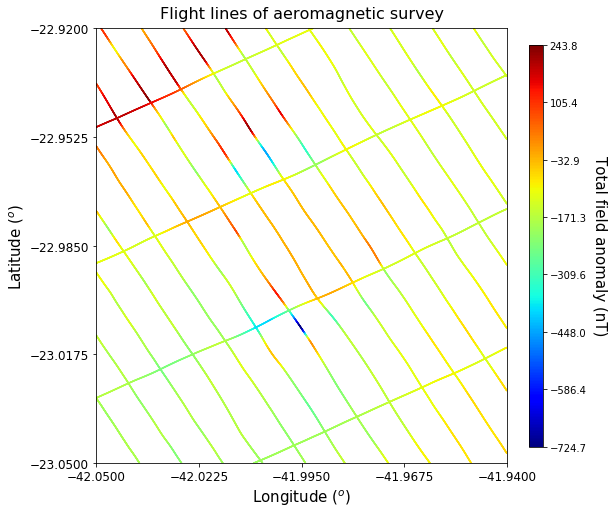

In [7]:
pyplot.close('all')
figure1 = pyplot.figure(figsize=(8,8))

p1 = pyplot.scatter(Long, Lat, s = 1., c = Tf, marker = '.', cmap = pyplot.cm.jet)
cbar1 = pyplot.colorbar(p1, aspect = 30, fraction = 0.03, orientation = 'vertical')
cbar1.set_label('Total field anomaly (nT)',fontsize = 15, rotation = -90, labelpad = 20)
cbar1.set_ticks(numpy.linspace(Tf.min(), Tf.max(), 8))
cbar1.set_clim(Tf.min(), Tf.max())

pyplot.title('Flight lines of aeromagnetic survey',fontsize = 16, pad = 10)
pyplot.xlabel('Longitude ($^o$)', fontsize = 15)
pyplot.ylabel('Latitude ($^o$)', fontsize = 15)
pyplot.xlim(longmin, longmax)
pyplot.ylim(latmin, latmax)
pyplot.xticks(numpy.linspace(longmin, longmax, 5), fontsize = 12)
pyplot.yticks(numpy.linspace(latmin, latmax, 5), fontsize = 12)

pyplot.show()

## Part 2 - Interpolate the data and drawing the basemap

In [8]:
# Define number of points and shape
num = 500
shape = (num, num)
longitude = numpy.linspace(longmin, longmax, num)
latitude = numpy.linspace(latmin, latmax, num)

In [9]:
# Creates the grid
gridlong, gridlat = numpy.meshgrid(longitude, latitude)

In [10]:
# Create the tuples
flightcoordinates = (Long, Lat)
gridcoordinates = (gridlong, gridlat)

In [11]:
# Interpolate the total field anomaly data and also the magnetic field intensity
Tfi = griddata(flightcoordinates, Tf, gridcoordinates, method = 'linear')

In [12]:
# Setting values for colorbar:
vtfmin = Tf.min()
vtfmax = Tf.max()

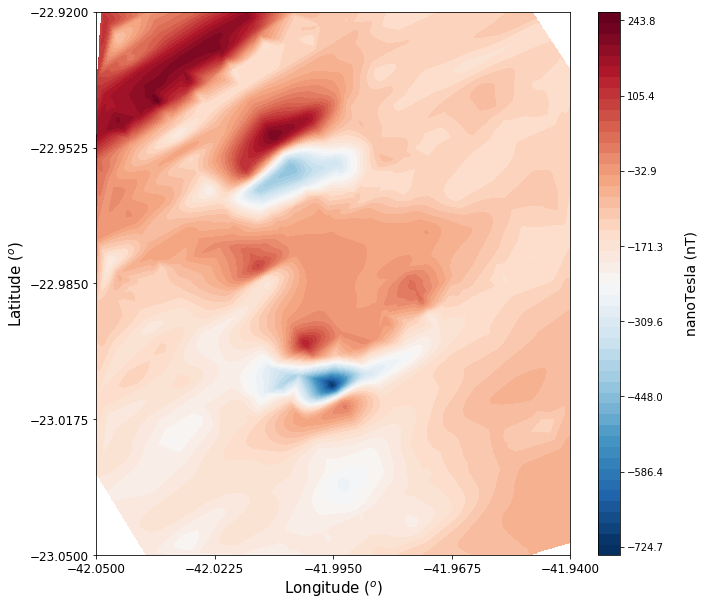

In [13]:
# Visualyzing the interpolated datapyplot
pyplot.close('all')
fig01 = pyplot.figure(figsize=(10,10))
# Plot for interpolated total field anomaly
image1 = pyplot.contourf(gridlong, gridlat, Tfi, 50, 
                         vmin = vtfmin, vmax = vtfmax, cmap = pyplot.cm.RdBu_r)
cbar1 = pyplot.colorbar(image1, aspect = 25, fraction = 0.1, orientation = 'vertical')
cbar1.set_label('nanoTesla (nT)', fontsize = 14, rotation = 90, labelpad = 20)
cbar1.set_ticks(numpy.linspace(vtfmin, vtfmax, 8))
cbar1.set_clim(vtfmin, vtfmax)
#pyplot.title('Magnetic total field anomaly (nT)', fontsize = 18)
pyplot.xlabel('Longitude ($^o$)', fontsize = 15)
pyplot.ylabel('Latitude ($^o$)', fontsize = 15)
pyplot.xlim(longmin, longmax)
pyplot.ylim(latmin, latmax)
pyplot.xticks(numpy.linspace(longmin, longmax, 5), fontsize = 12)
pyplot.yticks(numpy.linspace(latmin, latmax, 5), fontsize = 12)

pyplot.show()

In [14]:
# Setting the central values
long0 = 0.5*(longmin + longmax)
lat0 = 0.5*(latmin + latmax)

In [15]:
# Creating the bsaemap location
map1 = Basemap(llcrnrlon = longmin - 1., llcrnrlat = latmin - 1.,
               urcrnrlon = longmax + 1., urcrnrlat = latmax + 1., 
               resolution = 'i', projection = 'tmerc', 
               lon_0 = long0, lat_0 = lat0, epsg = 3395)

In [16]:
# Define meridians and parallels
meridians = numpy.linspace(0., 360., 721)
parallels = numpy.linspace(-90., 90., 361)

http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=-4792304.07865,-2742094.81771,-4557419.95308,-2485978.48715&bboxSR=3395&imageSR=3395&size=750,750&dpi=96&format=png32&f=image


/home/delimar/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3296: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/delimar/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3305: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/delimar/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/delimar/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


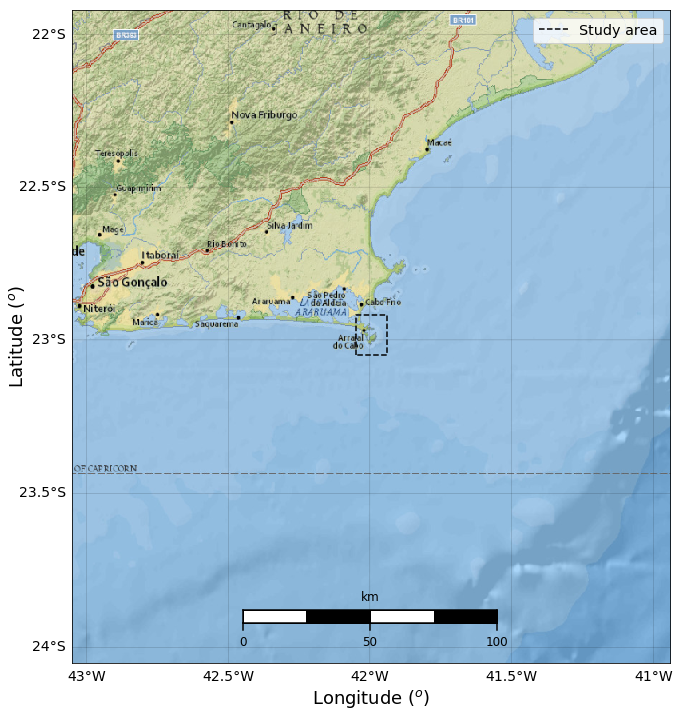

In [17]:
pyplot.close('all')
pyplot.figure(figsize=(14,12))
map1.arcgisimage(service='NatGeo_World_Map', xpixels = 750, ypixels = 750, verbose= True)
map1.drawmeridians(meridians, labels=[1, 0, 0, 1], fontsize = 14, linewidth = 0.25)
map1.drawparallels(parallels, labels=[1, 0, 0, 1], fontsize = 14, linewidth = 0.25)
map1.drawmapscale(-42., -23.9, longmax, latmax, 100, barstyle = 'fancy', fontsize = 12)
map1.plot((longmin, longmin, longmax, longmax, longmin), 
          (latmin, latmax, latmax, latmin, latmin), 
          'k--', linewidth = 1.5, label = 'Study area', latlon = True)
pyplot.legend(loc = 'upper right', fontsize = 'x-large')
pyplot.xlabel('Longitude $(^o)$', fontsize = 18, labelpad = 25)
pyplot.ylabel('Latitude $(^o)$', fontsize = 18, labelpad = 45)
pyplot.show()

In [18]:
# Creating the bsaemap location
map2 = Basemap(llcrnrlon = longmin - 0.25, llcrnrlat = latmin - 0.25,
               urcrnrlon = longmax + 0.25, urcrnrlat = latmax + 0.25, 
               resolution = 'f', projection = 'tmerc', 
               lon_0 = long0, lat_0 = lat0, epsg = 3395)

In [19]:
# Define meridians and parallels
meridians = numpy.linspace(0., 360., 721)
parallels = numpy.linspace(-90., 90., 361)

http://server.arcgisonline.com/ArcGIS/rest/services/NatGeo_World_Map/MapServer/export?bbox=-4708814.46056,-2651444.33329,-4640909.57117,-2575697.08259&bboxSR=3395&imageSR=3395&size=750,750&dpi=96&format=png32&f=image


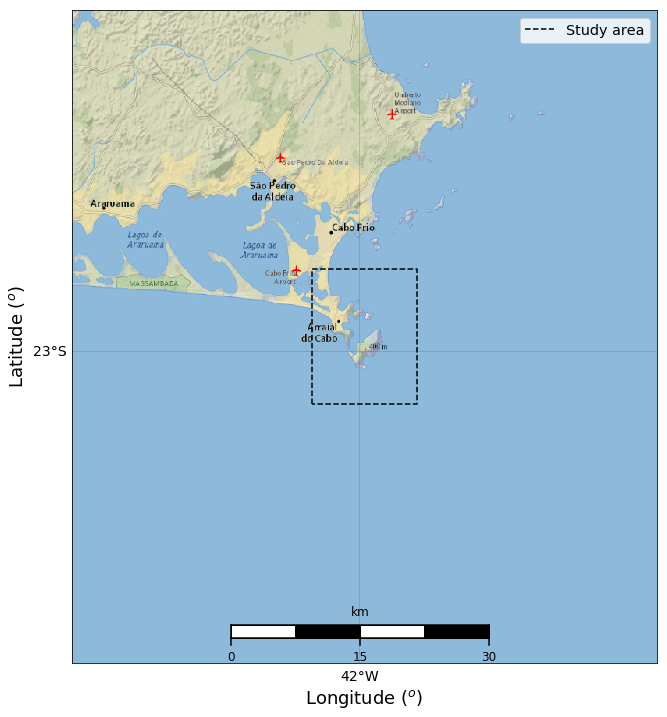

In [20]:
# Plotting the location map
pyplot.close('all')
pyplot.figure(figsize=(14,12))
map2.arcgisimage(service='NatGeo_World_Map', xpixels = 750, ypixels = 750, verbose= True)
map2.drawmeridians(meridians, labels=[1, 0, 0, 1], fontsize = 14, linewidth = 0.25)
map2.drawparallels(parallels, labels=[1, 0, 0, 1], fontsize = 14, linewidth = 0.25)
map2.drawmapscale(-42., -23.27, longmax, latmax, 30, barstyle = 'fancy', fontsize = 12)
map2.plot((longmin, longmin, longmax, longmax, longmin), 
          (latmin, latmax, latmax, latmin, latmin), 
          'k--', linewidth = 1.5, label = 'Study area', latlon = True)
pyplot.xlabel('Longitude $(^o)$', fontsize = 18, labelpad = 25)
pyplot.ylabel('Latitude $(^o)$', fontsize = 18, labelpad = 45)
pyplot.legend(loc = 'upper right', fontsize = 'x-large')
pyplot.show()

In [21]:
# Creating the basemap location
map3 = Basemap(llcrnrlon = longmin, llcrnrlat = latmin,
               urcrnrlon = longmax, urcrnrlat = latmax, 
               resolution = 'f', projection = 'tmerc', 
               lon_0 = long0, lat_0 = lat0, epsg = 3395)

In [22]:
# Drawing new parallels and meridians
paralells2 = numpy.linspace(-24., -22., 41)
meridians2 = numpy.linspace(-43., -41., 41)

/home/delimar/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/delimar/anaconda2/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


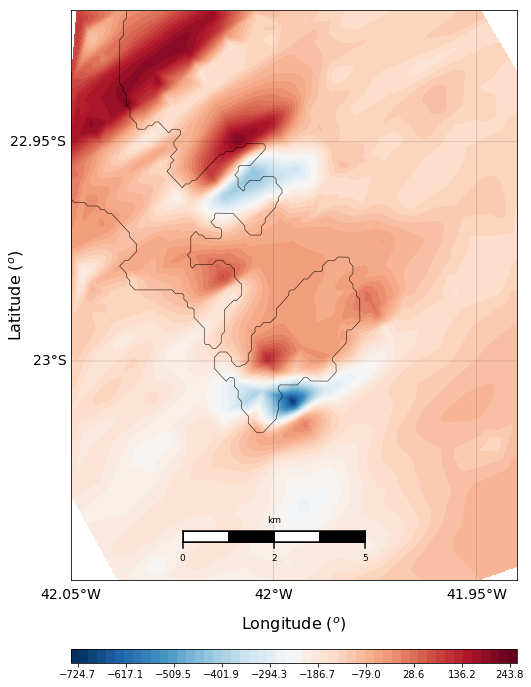

In [23]:
# Plotting the location map
pyplot.close('all')
pyplot.figure(figsize=(12, 12))
map3.drawmeridians(meridians2, labels=[1, 0, 0, 1], fontsize = 14, linewidth=0.25)
map3.drawparallels(paralells2, labels=[1, 0, 0, 1], fontsize = 14, linewidth=0.25)
map3.drawcoastlines(linewidth = 0.5, color = 'k', linestyle = 'solid')
map3.drawmapscale(-42, -23.04, longmax, latmax, 5, barstyle = 'fancy')
cs3 = map3.contourf(gridlong, gridlat, Tfi, 50, cmap = pyplot.cm.RdBu_r, latlon = True, alpha = 1.)
cbar = map3.colorbar(cs3, location = 'bottom', size = '2.5%', pad = '12%')
cbar.set_ticks(numpy.linspace(vtfmin, vtfmax, 10))
cbar.set_clim(vtfmin, vtfmax)
pyplot.xlabel('Longitude $(^o)$', fontsize = 16, labelpad = 35)
pyplot.ylabel('Latitude $(^o)$', fontsize = 16, labelpad = 45)
pyplot.show()

## Part 3 - Interpolation data

In [26]:
from utm import from_latlon
from codes import grids, auxiliars, statistical, prism, plot, filtering, derivative, equivalentlayer

Here we will work with projected coordinates 

In [27]:
# Create the grid
long0, lati0 = grids.regular_grid((longmin, longmax, latmin, latmax), shape)

In [28]:
# New total field anomaly data
tf = griddata((Long, Lat), Tf, (long0, lati0), method = 'linear', fill_value = 0.)

In [29]:
# New central points
newlong0 = 0.5*(long0.min() + long0.max())
newlati0 = 0.5*(lati0.min() + lati0.max())

In [30]:
map4 = Basemap(llcrnrlon = long0.min(), llcrnrlat = lati0.min(),
               urcrnrlon = long0.max(), urcrnrlat = lati0.max(), 
               resolution = 'f', projection = 'tmerc', 
               lon_0 = newlong0, lat_0 = newlati0, epsg = 3395)

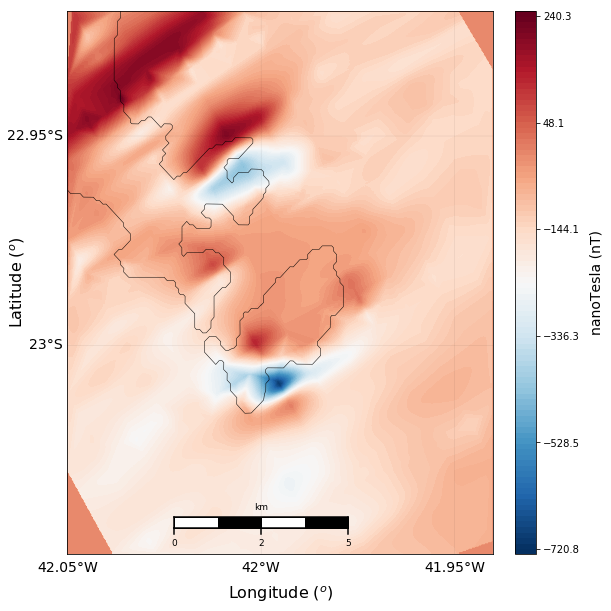

In [56]:
# Plotting the location map
pyplot.close('all')
pyplot.figure(figsize=(10, 10))
map4.drawmeridians(meridians2, labels=[1, 0, 0, 1], fontsize = 14, linewidth=0.1)
map4.drawparallels(paralells2, labels=[1, 0, 0, 1], fontsize = 14, linewidth=0.1)
map4.drawcoastlines(linewidth = 0.5, color = 'k', linestyle = 'solid')
map4.drawmapscale(-42., -23.0425, long0.max(), lati0.max(), 5, barstyle = 'fancy')
cs4 = map4.contourf(long0.reshape(shape), lati0.reshape(shape), tf.reshape(shape), 100, 
                    cmap = pyplot.cm.RdBu_r, latlon = True, alpha = 1.)
cbar = map4.colorbar(cs4, location = 'right', size = '5%', pad = '5%')
cbar.set_ticks(numpy.linspace(tf.min(), tf.max(), 6))
cbar.set_clim(tf.min(), tf.max())
cbar.set_label('nanoTesla (nT)', fontsize = 14, rotation = 90, labelpad = 10)
pyplot.xlabel('Longitude $(^o)$', fontsize = 16, labelpad = 30)
pyplot.ylabel('Latitude $(^o)$', fontsize = 16, labelpad = 40)
pyplot.show()

In [57]:
area1x = [-42.03, -42.03, -41.98, -41.98,  -42.03]
area1y = [-22.97, -22.93, -22.93, -22.97,  -22.97]
area2x = [-42.02, -42.02, -41.97, -41.97, -42.02]
area2y = [-23.03, -22.99, -22.99, -23.03, -23.03]

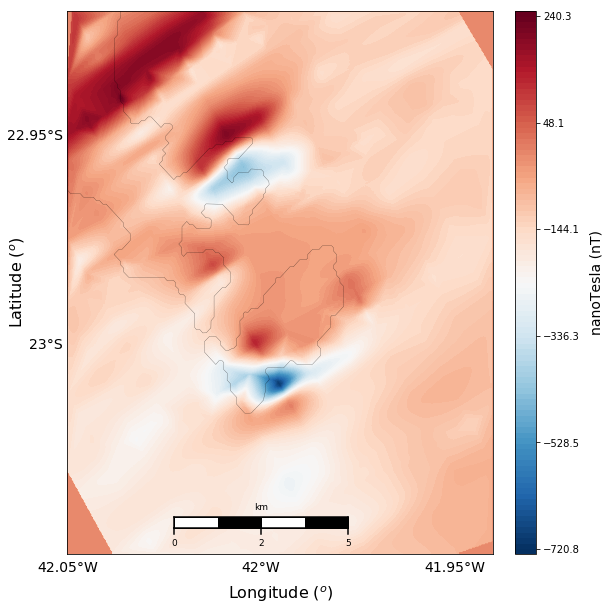

In [58]:
# Plotting the location map
pyplot.close('all')
pyplot.figure(figsize=(10, 10))
map4.drawmeridians(meridians2, labels=[1, 0, 0, 1], fontsize = 14, linewidth=0.)
map4.drawparallels(paralells2, labels=[1, 0, 0, 1], fontsize = 14, linewidth=0.)
map4.drawcoastlines(linewidth = 0.2, color = 'k', linestyle = 'solid')
map4.drawmapscale(-42., -23.0425, long0.max(), lati0.max(), 5, barstyle = 'fancy')
cs4 = map4.contourf(long0.reshape(shape), lati0.reshape(shape), tf.reshape(shape), 100, 
                    cmap = pyplot.cm.RdBu_r, latlon = True, alpha = 1.)
pyplot.plot(area1x, area1y, 'k--', linewidth = 2.)
pyplot.plot(area2x, area2y, 'k--', linewidth = 2.)
cbar = map4.colorbar(cs4, location = 'right', size = '5%', pad = '5%')
cbar.set_ticks(numpy.linspace(tf.min(), tf.max(), 6))
cbar.set_clim(tf.min(), tf.max())
cbar.set_label('nanoTesla (nT)', fontsize = 14, rotation = 90, labelpad = 10)
pyplot.xlabel('Longitude $(^o)$', fontsize = 16, labelpad = 30)
pyplot.ylabel('Latitude $(^o)$', fontsize = 16, labelpad = 40)
pyplot.show()